In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading and Saving Images

In [28]:
# load images into memory from disk
image = cv2.imread("../img/lego.jpg")

# split the image into its three channels
(B,G,R) = cv2.split(image)

# display the B matrix
print(B)

[[ 2 27 41 ...  0  7 19]
 [ 0 21 37 ...  1 15 25]
 [ 0 15 31 ...  9 24 31]
 ...
 [53 65 72 ... 19 21 23]
 [59 68 77 ... 30 30 30]
 [65 73 81 ... 45 44 43]]


In [30]:
img_plt = plt.imread("../img/lego.jpg")
img_cv2 = cv2.imread("../img/lego.jpg")

assert img_plt.shape == img_cv2.shape

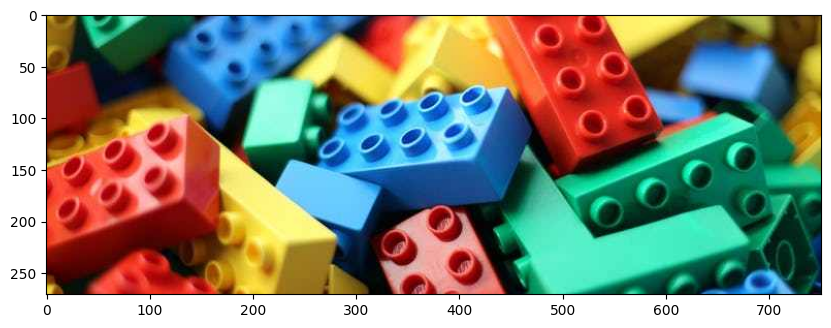

In [33]:
show_image(img_plt)

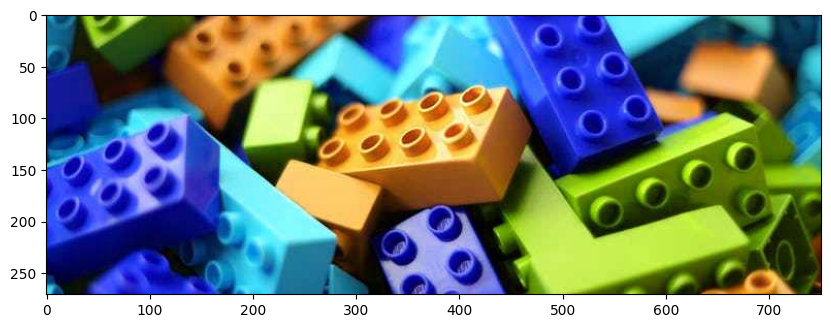

In [34]:
show_image(img_cv2)

In [14]:
# Accessing and Modifying pixel values
# loads an image
image = cv2.imread('../img/lego.jpg') # OpenCV reads images in as B, G, R
image = np.flip(image, axis = 2) # to Re-order channels as R, G, B for matplotlib renderer
# It returns a tuple of number of rows, columns and channels (if image is color)
image.shape

(271, 751, 3)

In [15]:
display(image)

array([[[175, 144,   2],
        [198, 167,  27],
        [210, 178,  41],
        ...,
        [ 78,  47,   0],
        [ 95,  64,   7],
        [107,  76,  19]],

       [[171, 140,   0],
        [192, 161,  21],
        [204, 172,  37],
        ...,
        [ 86,  55,   1],
        [103,  72,  15],
        [115,  85,  25]],

       [[165, 133,   0],
        [184, 152,  15],
        [197, 164,  31],
        ...,
        [ 95,  64,   9],
        [112,  81,  24],
        [121,  91,  31]],

       ...,

       [[223, 201,  53],
        [235, 210,  65],
        [243, 215,  72],
        ...,
        [  0,   7,  19],
        [  0,   8,  21],
        [  0,  10,  23]],

       [[224, 198,  59],
        [233, 207,  68],
        [241, 211,  77],
        ...,
        [  8,  11,  30],
        [  2,  14,  30],
        [  0,  14,  30]],

       [[226, 198,  65],
        [234, 206,  73],
        [241, 207,  81],
        ...,
        [ 23,  21,  45],
        [ 16,  22,  44],
        [  9,  24,  43]]

In [13]:
print(image.shape)

(266, 400, 3)


In [4]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    plt.show()

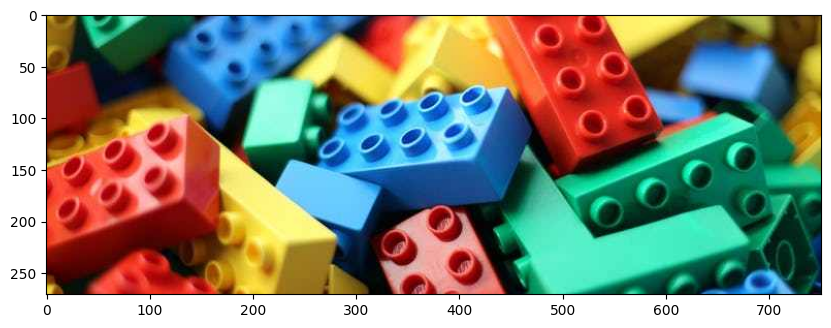

In [5]:
show_image(image)

In [ ]:
# accessing image section and converting it to white
image[10:50, 100:140] = [255, 255, 255]
show_image(image)

In [ ]:
cv2.imwrite('edited.png', image) # Remember OpenCV operations expect images to be in the format # B, G, R

### EXERCISE: Load an image using CV2 and use `show_image()` function to show it

In [ ]:
# TODO: What happens if we don't flip the image channels before showing it using matplotlib?
image = cv2.imread('../img/beach.png')
show_image(image)

### EXERCISE: Load an image using CV2, draw a white rectangle on it then save it to disk using CV2

In [ ]:
# TODO: Write your code below
image[20:30, 100:200] = [255, 255, 255]
cv2.imwrite('./edited.png', image)

## 2. Colour Channels

### 2.1 Order of Colour Channels

In [ ]:
shapes_image = "../img/beach.png"

In [ ]:
# reads image using matplotlib
shapes_matpotlib = plt.imread(shapes_image) # R, G, B

In [ ]:
show_image(shapes_matpotlib)

In [ ]:
# The order of colour channels read in is important - Notice the colour changes
shapes_cv2 = cv2.imread(shapes_image)
show_image(shapes_cv2)

In [ ]:
show_image(np.flip(shapes_cv2, axis = 2))

### 2.2 Flipping matrices with numpy

In [ ]:
x = np.array([[[1,2, 3], [2, 3, 4], [3, 4, 5]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 6]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 7]]])
x

In [ ]:
np.flip(x, axis =0 )

In [ ]:
np.flip(x, axis =1 )

In [ ]:
np.flip(x, axis =2 )

### 2.3 Splitting colour channels with matplotlib

In [ ]:
image = plt.imread('../img/beach.png')
show_image(image)
channels_matplotlib = [image[:, : , i] for i in range(3)]
names = ['Red', 'Green', 'Blue']
for name, channel in zip(names, channels_matplotlib):
    print(name)
    show_image(channel, cmap='gray')

### 2.4 Splitting colour channels with CV2

In [ ]:
image = cv2.imread('../img/beach.png') # B, G, R -> this order is required for showing images with cv2.imshow().
image = np.flip(image, axis = 2) # R, G, B -> This order is required for showing images with plt.imshow().
show_image(image)
cv2_channels = cv2.split(image)
for name, channel in zip(names, cv2_channels):
    print(name)
    show_image(channel, cmap='gray')

### EXERCISE: Write a script that uses argument parser to load, crop and display an image with CV2 then saves it into a file

In [ ]:
# Your code below

In [ ]:
# %load ../solutions/parsing_commands.py
import argparse
import cv2

# Construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help = 'Path to the image')
ap.add_argument('-o', '--output', required=True, help = 'Path to saving the image')
args = vars(ap.parse_args())

image = cv2.imread(args['image'])
cv2.imshow('Original', image)

cv2.waitKey(0)

# crop the image by slicing the matrix
cropped = image[100: 1000, 10:300]
cv2.imshow('Edited', cropped)

cv2.waitKey(0)

# save the image to specified path
cv2.imwrite(f'{args["output"]}/cropped_coding.jpg', cropped)



### Homework 1: Write a function that reads in an image using either the matplotlib or CV2 and shows it in this notebook using matplotlib 

In [ ]:
# TODO: Write your code below